## Basic_Graph

In [2]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [4]:
class AgentState(TypedDict):
    message : str

def node_a(state: AgentState) -> AgentState:
    state['message'] = "hey "+state["message"]
    return state

In [ ]:
graph = StateGraph(AgentState)
graph.add_node("Name_a", node_a)
graph.set_entry_point("Name_a")
graph.set_finish_point("Name_a")
app = graph.compile()

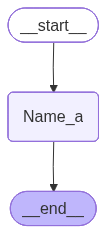

In [8]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
result = app.invoke({"message":"abhay"})
result["message"]
result

{'message': 'hey abhay'}

## Learning_1

In [16]:
from typing import TypedDict, Dict
from langgraph.graph import StateGraph

In [17]:
class AgentState(TypedDict):
    message : str

def node_a(state: AgentState) -> AgentState:
    state["message"] = state["message"] + " , doing an amzing Job, Man"
    return state

In [18]:
graph = StateGraph(AgentState)
graph.add_node("hello", node_a)
graph.set_entry_point("hello")
graph.set_finish_point("hello")
app = graph.compile()

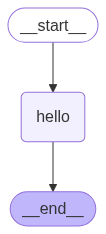

In [19]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [22]:
result = app.invoke({"message":"Hello Abhay"})
result["message"], result

('Hello Abhay , doing an amzing Job, Man',
 {'message': 'Hello Abhay , doing an amzing Job, Man'})

## Graph 2

In [36]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [37]:
class AgentState(TypedDict):
    values : List[int]
    name : str
    result : str

In [42]:
def process_values(state: AgentState) -> AgentState:
    state['result'] = f"hello There {state['name']}, Your Sum = {sum(state['values'])}"
    return state

In [43]:
graph = StateGraph(AgentState)
graph.add_node("Processor", process_values)
graph.set_entry_point("Processor")
graph.set_finish_point("Processor")
app = graph.compile()

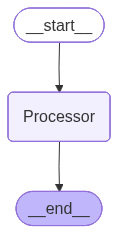

In [44]:
app

In [45]:
result = app.invoke({"values": [1, 2, 3, 4], "name":"abhay"})

In [48]:
result["name"]

'abhay'

In [49]:
result["result"]

'hello There abhay, Your Sum = 10'

In [50]:
result["values"]

[1, 2, 3, 4]

In [51]:
result

{'values': [1, 2, 3, 4],
 'name': 'abhay',
 'result': 'hello There abhay, Your Sum = 10'}

## Learning_2

In [58]:
from typing import TypedDict, List
from langgraph.graph import StateGraph
from functools import reduce
import operator

In [59]:
class AgentState(TypedDict):
    name: str
    values: List[int]
    operation: str
    result: str

In [60]:
def process_node(state: AgentState) -> AgentState:
    if state['operation'] == '+':
        total = sum(state['values'])
    elif state['operation'] == '*':
        total = reduce(operator.mul, state['values'], 1)
    else:
        total = 0  # default if unknown operation
    state['result'] = f"Hi {state['name']}, your answer is: {total}"
    return state

In [61]:
graph = StateGraph(AgentState)
graph.add_node("Compute", process_node)
graph.set_entry_point("Compute")
graph.set_finish_point("Compute")
app = graph.compile()

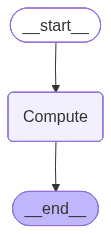

In [62]:
app

In [63]:
input_data = {"name": "Jack Sparrow", "values": [1, 2, 3, 4], "operation": "*"}
result = app.invoke(input_data)
print(result['result'])

Hi Jack Sparrow, your answer is: 24


## Graph-3

In [64]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [65]:
class AgentState(TypedDict):
    name : str
    age : str
    final : str

In [72]:
def first_node(state: AgentState) -> AgentState:
    state['final'] = f"hello, {state['name']}"
    return state

def second_node(state: AgentState) -> AgentState:
    state['final'] = state['final'] + f" you are {state['age']} years old!!"
    return state

In [73]:
graph = StateGraph(AgentState)
graph.add_node("node_a", first_node)
graph.add_node("node_b", second_node)
graph.set_entry_point("node_a")
graph.add_edge("node_a", "node_b")
graph.set_finish_point("node_b")
app = graph.compile()

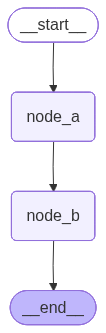

In [74]:
app

In [76]:
result = app.invoke({'name':'abhay', 'age':23})
result['final']

'hello, abhay you are 23 years old!!'

## Learn_3

In [82]:
from typing import TypedDict, List
from langgraph.graph import StateGraph
class AgentState(TypedDict):
    name : str
    age : str
    skills : List[str]
    final : str

In [83]:
def first_node(state: AgentState) -> AgentState:
    state['final'] = f"hello, {state['name']}"
    return state

def second_node(state: AgentState) -> AgentState:
    state['final'] = state['final'] + f" you are {state['age']} years old!!"
    return state

def third_node(state: AgentState) -> AgentState:
    state['final'] = state['final'] + f" you Skills {state['skills']}"
    return state

In [84]:
graph = StateGraph(AgentState)
graph.add_node("node_a", first_node)
graph.add_node("node_b", second_node)
graph.add_node("node_c", third_node)
graph.set_entry_point("node_a")
graph.add_edge("node_a", "node_b")
graph.add_edge("node_b", "node_c")
graph.set_finish_point("node_c")
app = graph.compile()

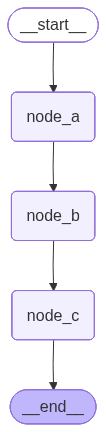

In [85]:
app

In [86]:
result = app.invoke({"age":20, "name":"abhay", "skills":['python', 'SQL', 'JS']})

In [87]:
result

{'name': 'abhay',
 'age': 20,
 'skills': ['python', 'SQL', 'JS'],
 'final': "hello, abhay you are 20 years old!! you Skills ['python', 'SQL', 'JS']"}

## Graph-4

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END